# Logistic Regression Model 

Trained and tested a logistic regression model to predict recession from the interest rate difference in long term and short term treasury securities

In [55]:
# Run the BEA base Jupyter Notebook

%run BEA_Base_For_ML_Model.ipynb

BEA_Base_For_ML_Model completed - gdp_df ready for use


In [56]:
# Run the Treasury base Jupyter Notebook

%run Treasury_Rates_Base_For_ML.ipynb

Treasury_Rates_Base_For_ML completed. treasury_df is ready for use 


In [57]:
# Import libraries

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import math
import matplotlib.pyplot as plt

In [58]:
# View the GDP dataframe

gdp_df.head()

Key Metrics,Year-Qtr,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Motor vehicles and parts,Furnishings and durable household equipment,Recreational goods and vehicles,Other durable goods,Nondurable goods,...,Fed- National Defense - Consumption expenditures,Fed- National Defense - Gross Investment,Nondefense,Fed - Nondefense - Consumption expenditures,Fed - Nondefense - Gross Investment,State and local,State and local - Consumption expenditures,State and local - Gross Investment,GDP_Growth,Is_Recession
0,1959Q1,510.330,309.449,169.723,43.649,18.090,15.143,6.290,4.125,126.074,...,42.349,18.787,11.230,8.456,2.774,44.829,30.172,14.656,0.000000,True
1,1959Q2,522.653,315.505,172.617,45.465,19.335,15.548,6.374,4.208,127.152,...,41.394,18.895,13.290,10.441,2.849,44.955,30.541,14.414,0.024147,False
2,1959Q3,525.034,320.725,174.524,46.336,20.073,15.647,6.392,4.224,128.188,...,42.051,19.347,13.134,10.339,2.795,44.960,30.964,13.996,0.004556,False
3,1959Q4,528.600,322.842,173.564,44.103,17.658,15.733,6.420,4.293,129.461,...,42.233,18.722,12.880,9.942,2.938,44.772,31.494,13.278,0.006792,False
4,1960Q1,542.648,326.364,175.060,45.455,19.343,15.522,6.359,4.232,129.605,...,41.592,18.432,10.957,7.822,3.135,45.970,32.436,13.534,0.026576,False


In [59]:
# View the Treasury dataframe

treasury_df.head()

,Year-Qtr,10-2 Rate Diff,10-1 Rate Diff
0,1959Q1,0.0,0.486667
1,1959Q2,0.0,0.340000
2,1959Q3,0.0,-0.100000
3,1959Q4,0.0,-0.333333
4,1960Q1,0.0,-0.083333


In [60]:
# Merge GDP DF and Treasury DF
gdp_df = pd.merge(gdp_df, treasury_df, on = "Year-Qtr")

In [61]:
# View the merged DataFrame
gdp_df.head()

,Year-Qtr,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Motor vehicles and parts,Furnishings and durable household equipment,Recreational goods and vehicles,Other durable goods,Nondurable goods,...,Nondefense,Fed - Nondefense - Consumption expenditures,Fed - Nondefense - Gross Investment,State and local,State and local - Consumption expenditures,State and local - Gross Investment,GDP_Growth,Is_Recession,10-2 Rate Diff,10-1 Rate Diff
0,1959Q1,510.330,309.449,169.723,43.649,18.090,15.143,6.290,4.125,126.074,...,11.230,8.456,2.774,44.829,30.172,14.656,0.000000,True,0.0,0.486667
1,1959Q2,522.653,315.505,172.617,45.465,19.335,15.548,6.374,4.208,127.152,...,13.290,10.441,2.849,44.955,30.541,14.414,0.024147,False,0.0,0.340000
2,1959Q3,525.034,320.725,174.524,46.336,20.073,15.647,6.392,4.224,128.188,...,13.134,10.339,2.795,44.960,30.964,13.996,0.004556,False,0.0,-0.100000
3,1959Q4,528.600,322.842,173.564,44.103,17.658,15.733,6.420,4.293,129.461,...,12.880,9.942,2.938,44.772,31.494,13.278,0.006792,False,0.0,-0.333333
4,1960Q1,542.648,326.364,175.060,45.455,19.343,15.522,6.359,4.232,129.605,...,10.957,7.822,3.135,45.970,32.436,13.534,0.026576,False,0.0,-0.083333


In [62]:
gdp_df["GDP_Growth"] = gdp_df["GDP_Growth"] * 100

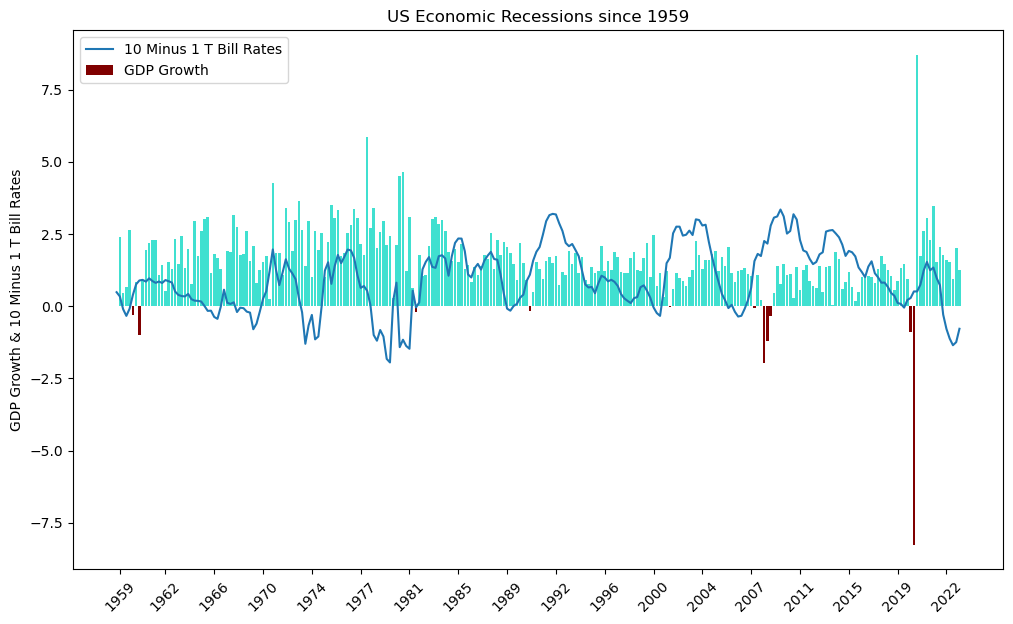

In [63]:
# Plot GDP Growth and mark recession (negative GDP Growth)

# Set the figure size

fig = plt.figure(figsize = (12, 7))

# Store GDP Growth in a list

gdp_growth = gdp_df["GDP_Growth"].to_list()

# Set the colors list to mark recession quarters

colors = [('turquoise' if g > 0 else 'maroon') for g in gdp_growth]

# Store Year - Quarter in a list
year_qtr = gdp_df["Year-Qtr"].to_list()

# Define a list for storing xticks
xticks=[]

# Define a list for storing xticks labels
xticks_labels=[]

# Build xticks and xticks_labels list by iterating over year_qtr list
for i in range(1, len(year_qtr)):
    if i%15 == 0 or i==1:
        sel_year_qtr = year_qtr[i]
        xticks_labels.append(sel_year_qtr[0:4])
        xticks.append(sel_year_qtr)

# Create bar chart using matplotlib
plt.bar(gdp_df["Year-Qtr"], gdp_df["GDP_Growth"], color=colors, label='GDP Growth')

# Create line plot using matplotlib
plt.plot(gdp_df["Year-Qtr"], gdp_df["10-1 Rate Diff"], label='10 Minus 1 T Bill Rates')

# Set the title of bar chart

plt.title("US Economic Recessions since 1959")

# Set the Ylabel

plt.ylabel("GDP Growth & 10 Minus 1 T Bill Rates")

# Set xticks for the bar chart
plt.xticks(xticks, xticks_labels, rotation=45)


# Show legend in upper left
plt.legend(loc="upper left")

# Save the chart
plt.savefig("../../images/economic_recessions_US_1959.png")


# Display the bar chart
plt.show()



In [64]:
# Define Features to predict on

X = gdp_df[['10-2 Rate Diff',
            '10-1 Rate Diff',
            'Change in private inventories'
           ]]

In [65]:
# Define the target variable

y = gdp_df["Is_Recession"]

In [66]:
# Split the test and train datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)


In [67]:
# Create the Logistic Regression model

model = LogisticRegression(solver="lbfgs", random_state=42)

In [68]:
# Fit the model

model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [69]:
# Predict values using the model

predicted_y_values = model.predict(X_test)

In [70]:
# Score the model

score = model.score(X_test, y_test)
print(score)

0.9807692307692307


In [71]:
# Print the accuracy score

accuracy_score(y_test, predicted_y_values)

0.9807692307692307

In [72]:
# Print the confusion matrix

confusion_matrix(y_test, predicted_y_values)

array([[50,  0],
       [ 1,  1]])

In [73]:
# Print the classification report

print(classification_report(y_test, predicted_y_values))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99        50
        True       1.00      0.50      0.67         2

    accuracy                           0.98        52
   macro avg       0.99      0.75      0.83        52
weighted avg       0.98      0.98      0.98        52



### Model Optimization

The accuracy score was recorded as 95.38% for the original model. The precision and recall for the 'True' label was 0.

To improve accuracy, precision, and recall, the following optimizations were done- 
* An additional feature "Change in Private Inventories' was introduced. 
* For the train and test split, the test size was adjusted to 20%, and stratify was set to 'y'

Following ML algorithms were tried out but didn't improve the score and hence wasn't considered for this model.

* K-Nearest Neighbors (KNN) algorithm
* Decision Tree
* XGBoost

### Conclusion

The optimized version of the Logistic regression model for predicting an economic recession based on differences in the interest rates of long-term and short-term treasuries and changes in private inventories achieved an accuracy score of **98.07%**. The precision and recall for ‘Is_Recession’ label ‘False’ are .98 and 1.00 respectively. The precision and recall for the ‘Is_Recession’ label ‘True’ are 1.0 and .50 respectively.

### We recommend this model for predicting an economic recession.
